# Set operations of Geo Objects

Tutorials from: https://geopandas.org/set_operations.html


In [3]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
import geopandas

In [4]:
polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])

In [5]:
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])

<AxesSubplot:>

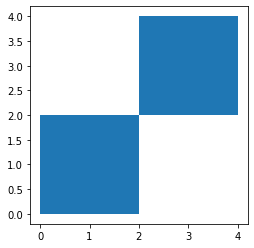

In [7]:
polys1.plot()

<AxesSubplot:>

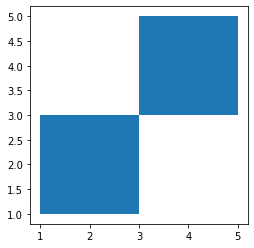

In [8]:
polys2.plot()

In [12]:
# convert to geopandas objects.
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

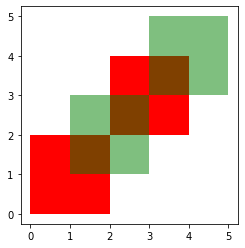

In [17]:
# plot
ax = df1.plot(color='red');
df2.plot(ax=ax, color='green', alpha=0.5);

In [19]:
# 1. union.
res_union = geopandas.overlay(df1, df2, how='union')

In [20]:
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."
3,1.0,NaN,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1...."
4,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
5,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
6,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


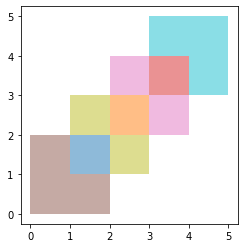

In [21]:
# sw: Union might be the thing I need in combining road and land use shapefiles.
ax = res_union.plot(alpha=0.5, cmap='tab10')


In [22]:
# 2. intersection
res_intersection = geopandas.overlay(df1, df2, how='intersection')


In [23]:
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."


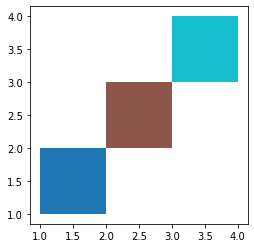

In [24]:
ax = res_intersection.plot(cmap='tab10')

In [25]:
# 3. symmetric difference.
res_symdiff = geopandas.overlay(df1, df2, how='symmetric_difference')


In [26]:
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1...."
1,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
2,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
3,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


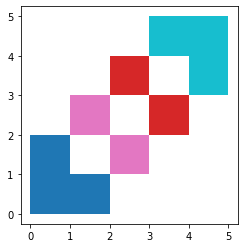

In [27]:
ax = res_symdiff.plot(cmap='tab10')

In [28]:
# 4. asymmetric difference.
res_difference = geopandas.overlay(df1, df2, how='difference')


In [29]:
res_difference

,geometry,df1
0,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....",1
1,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...",2


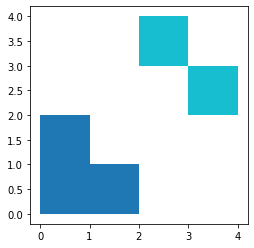

In [30]:
ax = res_difference.plot(cmap='tab10')